# The sparks foundation

# TASK 1 : Object Detection
    
# Presented by Kishore lal

# Importing Libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

# Loading model

In [2]:
configFile = r'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozenModel = r'frozen_inference_graph.pb'

In [3]:
model = cv.dnn_DetectionModel(frozenModel,configFile)

# Creating class

In [4]:
classLabels = []
file_name = 'object.txt'  # coco dataset
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')


# Printing coco dataset

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Setting up the configuration of the model

In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001C7CD56F050>

# capturing video

In [7]:
cap = cv.VideoCapture('Traffic.mp4')
#cap = cv.VideoCapture(0) ==> webcam
if not cap.isOpened():
     raise IOError("Cannot Open Video")

# Setting the font scale and font style

In [8]:
font_scale = 1.1
font = cv.FONT_HERSHEY_COMPLEX

# Reading each frame and detecting the objects in it

In [9]:
while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.62)
    if len(ClassIndex)!= 0:
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if ClassInd <= 80:
                cv.rectangle(frame,boxes,(255,0,0),2)
                cv.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color = (0,255,0),thickness = 3)
    cv.imshow("Object Detection Tutorial",frame)
    if cv.waitKey(2) & 0xFF == ord('q'):
        break 
cap.release()
cv.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


# For Image (optional)

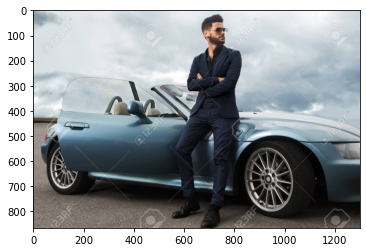

In [10]:
img = cv.imread(r'118940363-successful-handsome-man-near-the-car-.jpg')
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb);

In [11]:
ClassIndex, confidence, bbox = model.detect(rgb,confThreshold=0.5)

In [ ]:
font_scale = 1.1
font = cv.FONT_HERSHEY_COMPLEX
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv.rectangle(img,boxes,(255,0,0),2)
    cv.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color = (0,255,0),thickness = 3)
cv.imshow('118940363-successful-handsome-man-near-the-car-.jpg',img);
cv.waitKey(0)
